In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle
import pandas as pd
import seaborn as sns
import scipy.ndimage as ndimage

In [2]:
plt.rcParams["font.family"] = "Arial"   # 使用するフォント
plt.rcParams["font.size"] = 7 

In [3]:

df=pd.DataFrame()

df["Mean Square Error"]=[0.02,0.045,0.023,0.025,0.040,0.027]

df["Correration"]=[0.73,0.46,0.62,0.56,0.29,0.38]

df["Number of input images"]=[20,20,10,10,5,5]


df["Kinetics"]=["with","without","with","without","with","without"]

In [4]:
df.to_csv("Figde.csv")

In [3]:
s_n=11
img=np.load(f"B{s_n}_analyze.npy")[:,:]

In [162]:
df=pd.read_csv(f"./B{s_n}_full.csv")
#df=df[(df["Frame"]>100)&((df["Frame"]<150))]

In [163]:
st=50

In [164]:
df=df[(df["Frame"]>st)&((df["Frame"]<st+10))]

In [175]:
df

,Unnamed: 0,Frame,Tracking ID,Lineage ID,Position X (µm),Position Y (µm),Pixel Position X (pixels),Pixel Position Y (pixels),Volume (µm³),Mean Thickness (µm),...,Instantaneous Velocity X (µm/s),Instantaneous Velocity Y (µm/s),Track Length (µm),Perimeter (µm),Red - Integrated Intensity (),Red - Mean Intensity (),Red - Median Intensity (),Red - Standard Deviation Intensity (),Red - Maximum Intensity (),Red - Minimum Intensity ()
1042,51,51,1,1,287.985413,321.986908,221.362961,247.498566,179.083740,2.074698,...,-0.004376,0.003531,47.340790,26.019291,322735.812500,1909.681030,NaN,1117.149658,3879.008301,80.405823
1043,296,51,6,6,327.117859,365.633820,251.442535,281.048218,462.421265,3.140418,...,0.003918,0.023181,193.373810,36.427006,243087.765600,807.600159,NaN,358.258118,1832.394287,57.707825
1044,531,51,10,10,313.374847,373.759888,240.878830,287.294403,470.875397,3.057268,...,-0.017578,-0.015167,193.957169,39.028934,426361.250000,1370.937012,NaN,831.450745,3037.706055,2.780090
1045,833,51,13,13,331.943909,397.019196,255.152130,305.172913,298.125549,2.841034,...,0.008333,0.015193,190.492554,29.922184,287861.031300,1370.766479,NaN,764.706726,3317.284668,6.215454
1046,989,51,25,25,356.962158,417.445190,274.382660,320.873566,329.705597,2.465858,...,-0.004290,-0.001255,295.668915,36.427006,112256.812500,417.311584,NaN,177.270279,1011.484009,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2539,59,595,595,346.115662,397.389282,266.045380,305.457398,49.757675,2.099911,...,0.006340,0.002603,7.463121,14.310611,5524.287598,172.633987,NaN,126.299988,838.975647,78.345032
1230,2545,59,602,602,312.449951,451.664001,240.167892,347.176208,146.974396,2.170954,...,0.019067,0.008538,16.525167,23.417362,340169.718800,2678.501465,NaN,2070.545654,5942.057617,22.266724
1231,2546,59,625,625,368.335388,361.312225,283.124817,277.726379,216.726059,2.246494,...,NaN,NaN,0.000000,31.223148,443613.875000,2424.119141,NaN,1124.286011,4432.166992,125.852295
1232,2704,59,646,646,379.149109,409.636475,291.436890,314.871307,440.023071,2.888696,...,0.013282,-0.012904,58.646507,37.727970,242913.312500,783.591492,NaN,550.506409,1802.837646,0.000000


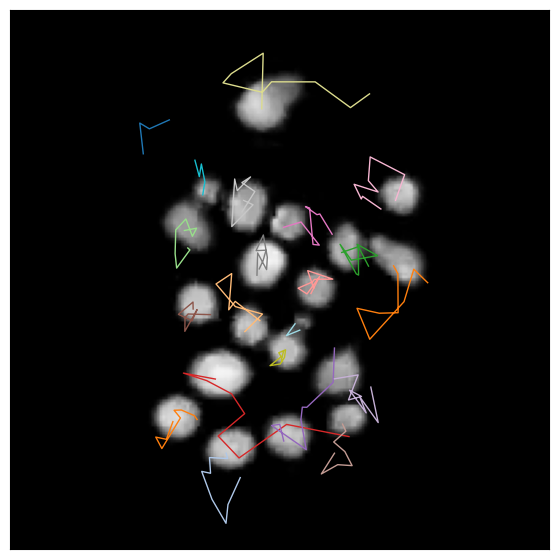

In [177]:
plt.figure(figsize=(7,7))
plt.imshow(img[st,:,:,0],cmap="Greys_r")
sns.set_palette("tab20")

for ID in range(len(np.unique(df["Tracking ID"]))):
    t_df=df[df["Tracking ID"]==np.unique(df["Tracking ID"])[ID]]
    plt.plot(t_df["Pixel Position X (pixels)"]*1.87,t_df["Pixel Position Y (pixels)"]*1.87,"-",lw=1)
    plt.xticks([])
    plt.yticks([])
plt.xlim(390,590)
plt.ylim(490,690)

plt.rcParams["svg.fonttype"] = "none"
plt.savefig("./Fig6_a.svg",transparent=True,dpi=300)
    

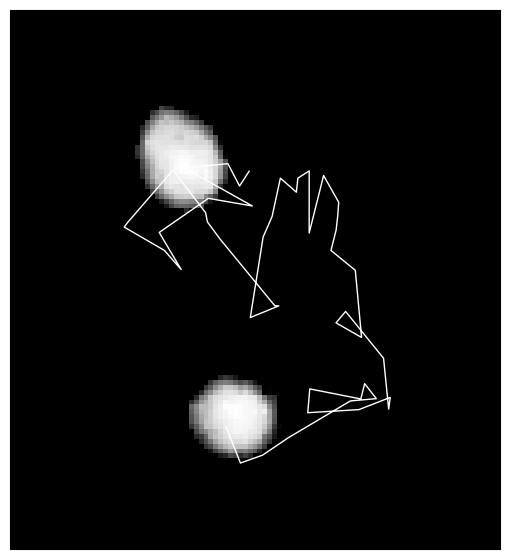

In [156]:
df=pd.read_csv(f"./B{s_n}_full.csv")
df=df[(df["Frame"]>100)&((df["Frame"]<150))]

plt.figure(figsize=(7,7))

B2_label=np.load(f"B{s_n}_label_fin.npy")[:,:]
sns.set_palette("tab20")

ID=12
t_df=df[df["Tracking ID"]==np.unique(df["Tracking ID"])[ID]]
plt.plot(t_df["Pixel Position X (pixels)"]*1.87,t_df["Pixel Position Y (pixels)"]*1.87,"-",lw=1,c="white")
plt.xticks([])
plt.yticks([])

t_img=np.zeros((img.shape[1],img.shape[2]))
s=6
sns.set_palette("viridis",7)
for i in range(7):
    x=int(t_df["Pixel Position X (pixels)"].iloc[i*s]*1.87)
    y=int(t_df["Pixel Position Y (pixels)"].iloc[i*s]*1.87)
    n=np.max(B2_label[t_df["Frame"].iloc[i*s]-1,y-5:y+5,x-5:x+5])
    mask=B2_label[t_df["Frame"].iloc[i*s]-1]
    mask[~(mask==n)]=0
    if (i ==0) or (i ==6):
        t_img+=(img[t_df["Frame"].iloc[i*s]-1,:,:,0]*mask)/np.max(img[t_df["Frame"].iloc[i*s]-1,:,:,0]*mask)
   
    #plt.scatter(x,y,c=f"C{i}",s=50)
plt.imshow(t_img,cmap="Greys_r")
plt.xlim(460,560)
plt.ylim(560,670)

plt.rcParams["svg.fonttype"] = "none"
plt.savefig("./Fig6_a-2.svg",transparent=True,dpi=300)
    

In [82]:
B2_label=np.load(f"B{s_n}_label_fin.npy")[:,:]

In [89]:
t_img.shape

(1080, 1080)

In [95]:
np.max(img[100+i*5,:,:,0]*mask)

0.0

/var/folders/gv/77cbmplx37x0s09dxxfc_zvm0000gn/T/ipykernel_74263/3404650180.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,1+i)


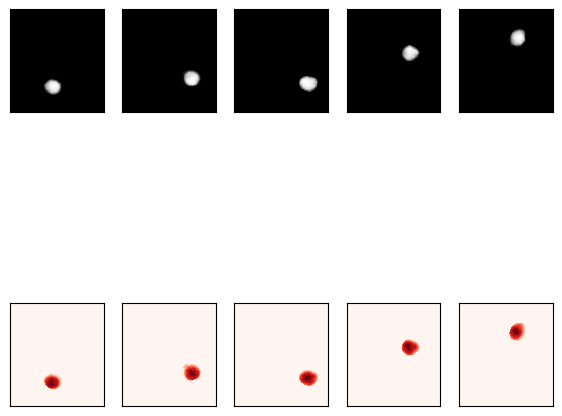

In [135]:
df=pd.read_csv(f"./B{s_n}_full.csv")
df=df[(df["Frame"]>100)&((df["Frame"]<150))]

plt.figure(figsize=(7,7))

B2_label=np.load(f"B{s_n}_label_fin.npy")[:,:]
sns.set_palette("tab20")

ID=12
t_df=df[df["Tracking ID"]==np.unique(df["Tracking ID"])[ID]]
plt.xticks([])
plt.yticks([])

t_img=np.zeros((img.shape[1],img.shape[2]))
s=6
sns.set_palette("viridis",7)
x0=int(t_df["Pixel Position X (pixels)"].iloc[0]*1.87)
y0=int(t_df["Pixel Position Y (pixels)"].iloc[0]*1.87)

for i in range(5):
    x=int(t_df["Pixel Position X (pixels)"].iloc[i*s]*1.87)
    y=int(t_df["Pixel Position Y (pixels)"].iloc[i*s]*1.87)
    n=np.max(B2_label[t_df["Frame"].iloc[i*s]-1,y-5:y+5,x-5:x+5])
    mask=B2_label[t_df["Frame"].iloc[i*s]-1]
    mask[~(mask==n)]=0
    for j in range(2):
        plt.subplot(2,5,1+i)
        t_img=img[t_df["Frame"].iloc[i*s]-1,:,:,0]*mask
        plt.imshow(t_img/t_img.max(),cmap="Greys_r")
        plt.xlim(460,560)
        plt.ylim(560,670)
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(2,5,6+i)
        t_img=img[t_df["Frame"].iloc[i*s]-1,:,:,1]*mask
        plt.imshow(t_img,cmap="Reds")
        plt.xlim(460,560)
        plt.ylim(560,670)
        plt.xticks([])
        plt.yticks([])

plt.rcParams["svg.fonttype"] = "none"
plt.savefig("./Fig6_a-3.svg",transparent=True,dpi=300)
    

In [ ]:
d

/var/folders/gv/77cbmplx37x0s09dxxfc_zvm0000gn/T/ipykernel_74263/2400694166.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,1+i)


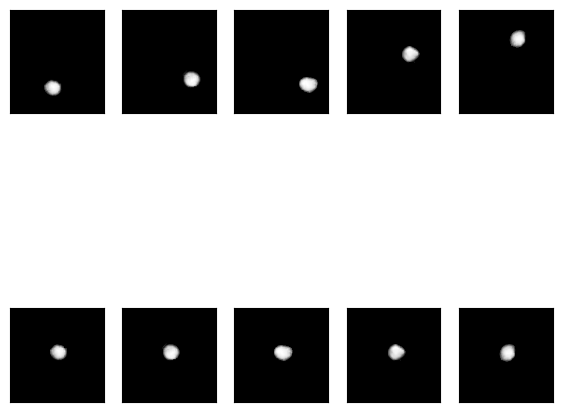

In [181]:
df=pd.read_csv(f"./B{s_n}_full.csv")
df=df[(df["Frame"]>100)&((df["Frame"]<150))]

plt.figure(figsize=(7,7))

B2_label=np.load(f"B{s_n}_label_fin.npy")[:,:]
sns.set_palette("tab20")

ID=12
t_df=df[df["Tracking ID"]==np.unique(df["Tracking ID"])[ID]]
plt.xticks([])
plt.yticks([])

t_img=np.zeros((img.shape[1],img.shape[2]))
s=6
sns.set_palette("viridis",7)
x0=int(t_df["Pixel Position X (pixels)"].iloc[0]*1.87)
y0=int(t_df["Pixel Position Y (pixels)"].iloc[0]*1.87)

for i in range(5):
    x=int(t_df["Pixel Position X (pixels)"].iloc[i*s]*1.87)
    y=int(t_df["Pixel Position Y (pixels)"].iloc[i*s]*1.87)
    n=np.max(B2_label[t_df["Frame"].iloc[i*s]-1,y-5:y+5,x-5:x+5])
    mask=B2_label[t_df["Frame"].iloc[i*s]-1]
    mask[~(mask==n)]=0
    for j in range(2):
        plt.subplot(2,5,1+i)
        t_img=img[t_df["Frame"].iloc[i*s]-1,:,:,0]*mask
        plt.imshow(t_img/t_img.max(),cmap="Greys_r")
        plt.xlim(460,560)
        plt.ylim(560,670)
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(2,5,6+i)
        t_img=img[t_df["Frame"].iloc[i*s]-1,:,:,0]*mask
        plt.imshow(t_img,cmap="Greys_r")
        plt.xlim(x-50,x+50)
        plt.ylim(y-50,y+50)
        plt.xticks([])
        plt.yticks([])

plt.rcParams["svg.fonttype"] = "none"
plt.savefig("./Fig6_b.svg",transparent=True,dpi=300)
    

In [202]:
df=pd.DataFrame()
df2=pd.DataFrame()

In [203]:
n

24.0

In [227]:
df=pd.DataFrame()
df2=pd.DataFrame()

df["Actual"]=np.load("./move_less/ans_20.npy")
df["Pred"]=np.load("./move_less/pred_20.npy")
df["Label"]="Moveless"

In [282]:

from sklearn.metrics import mean_squared_error
mean_squared_error(np.load("./move_less/ans_5_2.npy"),np.load("./move_less/pred_5_2.npy"))

0.027413752545124587

In [281]:

from sklearn.metrics import mean_squared_error
np.corrcoef(np.load("./move_less/ans_5_2.npy"),np.load("./move_less/pred_5_2.npy"))

array([[1.        , 0.37603999],
       [0.37603999, 1.        ]])

In [280]:

from sklearn.metrics import mean_squared_error
np.corrcoef(np.load("./move/ans_5_2.npy"),np.load("./move/pred_5_2.npy"))

FileNotFoundError: [Errno 2] No such file or directory: './move/ans_5_2.npy'

In [235]:

from sklearn.metrics import mean_squared_error
mean_squared_error(np.load("./move/ans_10.npy"),np.load("./move/pred_10.npy"))

0.022885041751110294

In [4]:
df=pd.DataFrame()
df2=pd.DataFrame()

df["Actual"]=np.load("./move_less/ans_10.npy")
df["Pred"]=np.load("./move_less/pred_10.npy")
df["Label"]="Moveless"



df2["Actual"]=np.load("./move/ans_10.npy")
df2["Pred"]=np.load("./move/pred_10.npy")
df2["Label"]="Move"

In [5]:
df=pd.concat([df,df2]).reset_index(drop=True)

In [8]:
df.to_csv("Fig5C.csv")

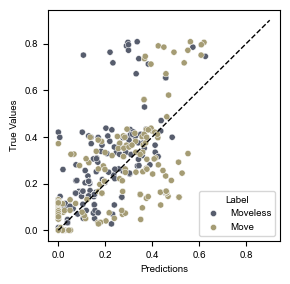

In [6]:
sns.set_palette("cividis",2)
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df,x="Pred",y="Actual",hue="Label",s=20)
plt.plot([0 ,0.9],[0,0.9], '--', color='k',lw=1)

plt.ylabel('True Values')
plt.xlabel('Predictions')


plt.rcParams["svg.fonttype"] = "none"
plt.savefig("./Fig6_c.svg",transparent=True,dpi=300)

In [296]:


df=pd.DataFrame()

df["Mean Square Error"]=[0.02,0.045,0.023,0.025,0.040,0.027]

df["Correration"]=[0.73,0.46,0.62,0.56,0.29,0.38]

df["Number of input images"]=[20,20,10,10,5,5]


df["Kinetics"]=["with","without","with","without","with","without"]

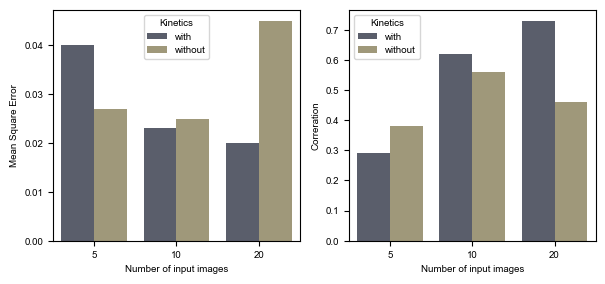

In [298]:
plt.figure(figsize=(7, 3))

plt.subplot(1,2,1)
sns.barplot(data=df,x="Number of input images",y="Mean Square Error",hue="Kinetics",palette="cividis")


plt.subplot(1,2,2)
sns.barplot(data=df,x="Number of input images",y="Correration",hue="Kinetics",palette="cividis")

plt.rcParams["svg.fonttype"] = "none"
plt.savefig("./Fig6_d.svg",transparent=True,dpi=300)


<Axes: xlabel='Number of input images', ylabel='Correration'>

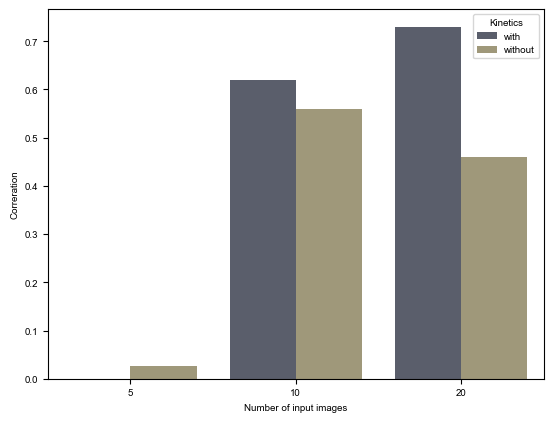

In [258]:
sns.barplot(data=df,x="Number of input images",y="Correration",hue="Kinetics",palette="cividis")